In [1]:
#in questo notebook faccio LMM e t-test (sia parametrico che non) per vedere l'impatto delle mie VI sulla VD = VisitedAreas (i.e., numero di aree visitate per trial)

In [1]:
import json
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy.optimize as opt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from copy import deepcopy

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

In [3]:
data = pd.read_csv('out/results.csv')  # read data

In [4]:
import statsmodels
endog = data["VisitedAreas"] # variabile dipendente - VisitedAreas si riferisce al numero di aree visitate dal soggetto in quel trial
exog = data[["LongBattery","RichEnvironment","FirstAreaRich"]] # variabili indipendenti


groups = data['Subject'] # nel modello lineare misto devo mettere il gruppo
model = statsmodels.regression.mixed_linear_model.MixedLM(endog, exog, groups)
result = model.fit()
print(result.summary())

formula = "VisitedAreas ~  LongBattery * FirstAreaRich + LongBattery * RichEnvironment + RichEnvironment * FirstAreaRich" 


model = smf.mixedlm(formula, data=data, groups = data['Subject'])

result = model.fit()
print(result.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: VisitedAreas
No. Observations: 1240    Method:             REML        
No. Groups:       31      Scale:              0.6660      
Min. group size:  40      Log-Likelihood:     -1614.3721  
Max. group size:  40      Converged:          Yes         
Mean group size:  40.0                                    
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
LongBattery      1.211    0.046 26.101 0.000  1.120  1.302
RichEnvironment  0.035    0.055  0.628 0.530 -0.074  0.143
FirstAreaRich   -0.261    0.066 -3.985 0.000 -0.390 -0.133
Group Var       12.220    3.878                           

                         Mixed Linear Model Regression Results
Model:                      MixedLM           Dependent Variable:           VisitedAreas
No. Observations:           1240

In [6]:
condizione_7 = (data["LongBattery"] == True) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data7 = data [condizione_7]

condizione_8 = (data["LongBattery"] == True) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data8 = data [condizione_8]

condizione_9 = (data["LongBattery"] == False) & (data["RichEnvironment"] == True) & (data["FirstAreaRich"] == True)
data9 = data [condizione_9]

condizione_10 = (data["LongBattery"] == False) & (data["RichEnvironment"] == False) & (data["FirstAreaRich"] == True)
data10 = data [condizione_10]



visited_areas_1 = data7["VisitedAreas"] # dentro data 7 prendi solo la colonna "BoxOpenedFirstArea"
visited_areas_1 = visited_areas_1.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

visited_areas_2 = data8["VisitedAreas"] # dentro data 8 prendi solo la colonna "BoxOpenedFirstArea"
visited_areas_2 = visited_areas_2.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

visited_areas_3 = data9["VisitedAreas"] # dentro data 9 prendi solo la colonna "BoxOpenedFirstArea"
visited_areas_3 = visited_areas_3.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

visited_areas_4 = data10["VisitedAreas"] # dentro data 10 prendi solo la colonna "BoxOpenedFirstArea"
visited_areas_4 = visited_areas_4.to_numpy() #toglie gli indici e mi scrive solo i valori dei BoxOpenedFirstArea

(array([ 0.,  9., 43., 46., 60.]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

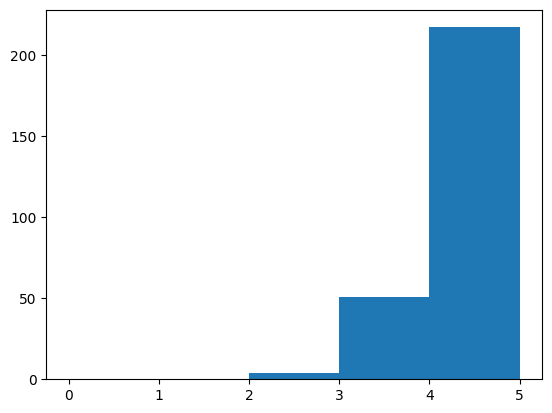

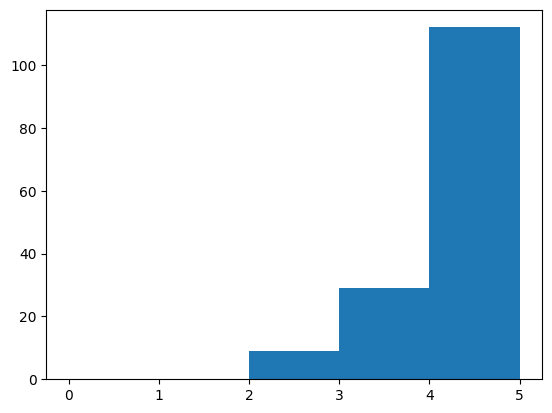

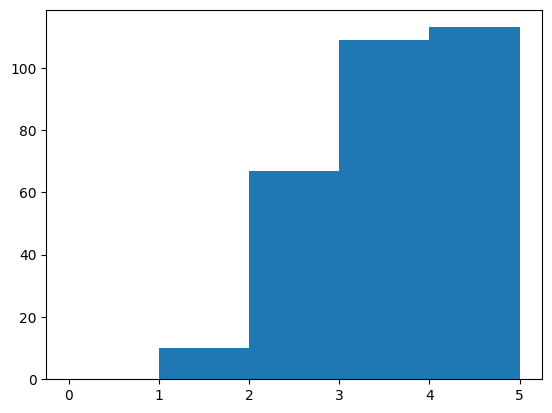

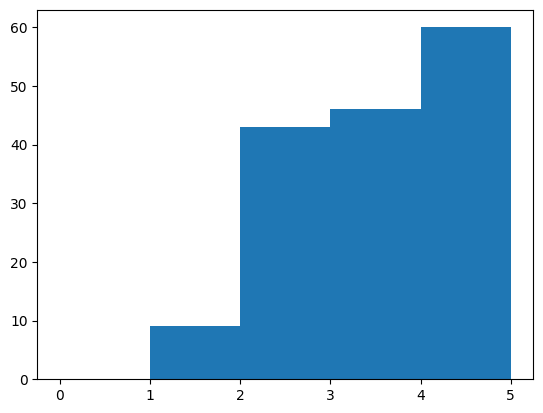

In [7]:

plt.figure()
plt.hist(visited_areas_1,np.arange(6))

plt.figure()
plt.hist(visited_areas_2,np.arange(6))

plt.figure()
plt.hist(visited_areas_3,np.arange(6))

plt.figure()
plt.hist(visited_areas_4,np.arange(6))

In [8]:
# a seguire faccio il t-test

import scipy.stats as stats

# t-test delle condizioni in cui la batteria è lunga
t_stat, p_value = stats.ttest_ind(visited_areas_1, visited_areas_2)
print("t-test a campioni indipendenti sulle condizioni con la batteria lunga:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



# t-test delle condizioni in cui la batteria è corta
t_stat, p_value = stats.ttest_ind(visited_areas_3, visited_areas_4)
print("t-test a campioni indipendenti sulle condizioni con la batteria corta:", t_stat, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test a campioni indipendenti sulle condizioni con la batteria lunga: -0.06752942655575446 0.9461886516561384
Nessuna differenza significativa
t-test a campioni indipendenti sulle condizioni con la batteria corta: 1.2640983034417872 0.20682397365396085
Nessuna differenza significativa


In [9]:
import scipy.stats as stats


statistic, p_value = stats.mannwhitneyu(visited_areas_1, visited_areas_2)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")



statistic, p_value = stats.mannwhitneyu(visited_areas_3, visited_areas_4)
print("t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta:", statistic, p_value)

alpha = 0.05
if p_value < alpha:
    print("Differenza significativa")
else:
    print("Nessuna differenza significativa")

t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria lunga: 25898.0 0.7329948700404562
Nessuna differenza significativa
t-test non parametrico (Wilconxon-Mann-Whitney) sulle condizioni con la batteria corta: 26320.5 0.2804545748082813
Nessuna differenza significativa


In [10]:

# Perform Mann-Whitney U test and store results
results = []
statistic, p_value = stats.mannwhitneyu(visited_areas_1, visited_areas_2)
results.append(["Long battery conditions", statistic, p_value, "Significant difference" if p_value < 0.05 else "Non significant difference"])

statistic, p_value = stats.mannwhitneyu(visited_areas_3, visited_areas_4)
results.append(["Short battery conditions", statistic, p_value,"Significant difference" if p_value < 0.05 else "Non significant difference"])

# Create a DataFrame to store the results
columns = ["Test", "Statistic", "P-Value", "Significance"]
results_df = pd.DataFrame(results, columns=columns)

# Save the results to a CSV file
results_df.to_csv('VisitedAreas_mannwhitneyresultss.csv', index=False)

print("Results saved to 'VisitedAreas_mannwhitneyresultss.csv'.")

Results saved to 'VisitedAreas_mannwhitneyresultss.csv'.
